In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error




In [195]:
import json
from pandas.io.json import json_normalize

In [196]:

#загрузить из json
with open('1.json', 'r', encoding='utf-8') as fh: #открываем файл на чтение
    data = json.load(fh) #загружаем из файла данные в словарь data

In [197]:
df = pd.DataFrame(data)

In [221]:
df.drop(['unit'], axis=1)

,average,timestamp
0,50.22,1541174400000
1,54.04,1541174700000
2,60.96,1541175000000
3,33.19,1541175300000
4,33.30,1541175600000
...,...,...
2012,50.74,1541778000000
2013,52.00,1541778300000
2014,49.39,1541778600000
2015,46.89,1541778900000


In [223]:
def moving_average(series, n):
    return np.average(series[-n:])


In [234]:
 rolling_mean = df.average.rolling(window=100).mean()
 
 

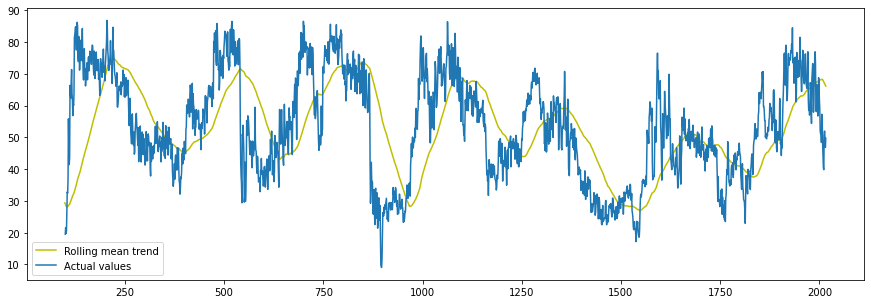

In [270]:
plt.figure(figsize=(15,5))
plt.plot(rolling_mean, "y", label="Rolling mean trend")
plt.plot(df.average[100:], label="Actual values")
plt.legend(loc="best")


In [354]:
def weighted_average(series, weights ,n,j):
    weights.reverse()
    result = 0.0
    for i in range(len(weights)):
        result += series[i+j] * weights[i]
    return result

In [352]:
vals=[]
vals[0:5]=df.average[0:5]
for k in range(len(df.index)-5):
    rolling_weight_average = weighted_average(df.average, [0.4,0.3,0.2, 0.1, 0.1], 5, k )
    vals.append(rolling_weight_average)
    

In [348]:
df2 = pd.DataFrame({'average':vals, 'timestamp':df.timestamp})

In [349]:
df2.head()

,average,timestamp
0,50.22,1541174400000
1,54.04,1541174700000
2,60.96,1541175000000
3,33.19,1541175300000
4,33.30,1541175600000


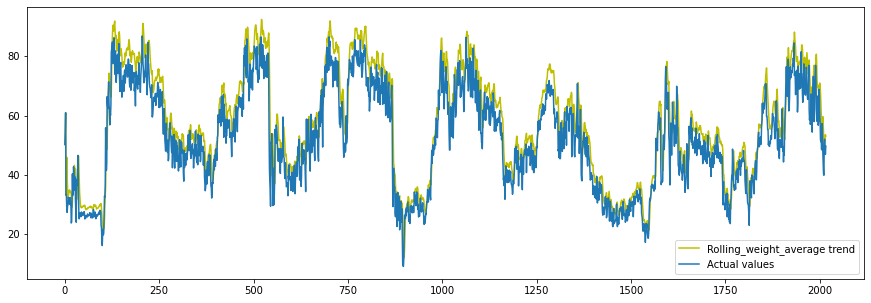

In [355]:
plt.figure(figsize=(15,5))
plt.plot(df2.average, "y", label="Rolling_weight_average trend")
plt.plot(df.average, label="Actual values")
plt.legend(loc="best")